In [2]:
# Install the Pillow package
%pip install Pillow

from PIL import ImageCms

# Open an ICC profile file
icc_profile = '/data/colors.cp'

# Load the color profile
try:
    profile = ImageCms.getOpenProfile(icc_profile)
    print("ICC Profile Details:", profile)
except Exception as e:
    
    print("Error reading the ICC profile:", e)


Note: you may need to restart the kernel to use updated packages.
Error reading the ICC profile: cannot open profile file


In [10]:
# Open the .cp file in binary mode
with open('data/colors.cp', 'rb') as file:
    binary_data = file.read()

# Print raw binary data (for debugging)
print(binary_data[:200])


b"cnumpy.core.multiarray\n_reconstruct\np1\n(cnumpy\nndarray\np2\n(I0\ntS'b'\ntRp3\n(I1\n(I4941\nI12\ntcnumpy\ndtype\np4\n(S'f8'\nI0\nI1\ntRp5\n(I3\nS'<'\nNNNI-1\nI-1\nI0\ntbI00\nS'\\x00\\x00\\x00\\x00\\x00@c@\\x00\\x00\\x00\\x00\\x00\\x0"


In [5]:
import cv2
import numpy as np

for i in range(5000):
    try: 
        # 隨機生成 LAB 值
        l, a, b = (np.random.rand(3) * 255.).astype(np.uint8)

        # 創建形狀為 (1, 1, 3) 的 LAB 數據
        lab_color = np.array([[[l, a, b]]], dtype=np.uint8)

        # 將 LAB 轉換為 RGB
        rgb_color = cv2.cvtColor(lab_color, cv2.COLOR_LAB2RGB)

        # print("LAB:", lab_color)
        # print("RGB:", rgb_color)
    except Exception as e:
        print("Error:", e)
        break


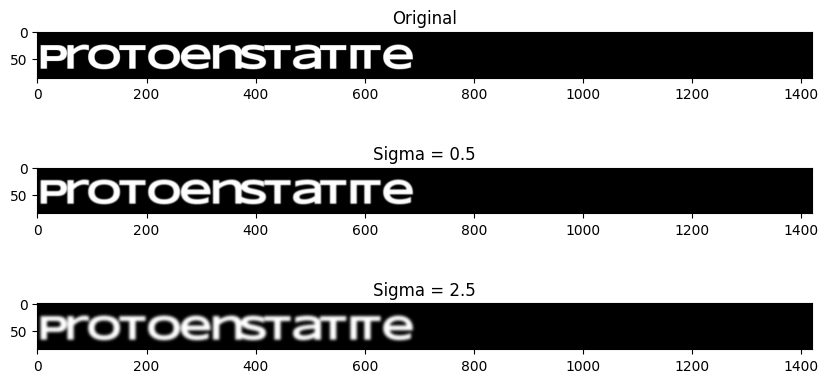

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖片
img = cv2.imread('../test.jpg')

# 測試不同 sigma 值
blur = 21
blurred_1_0= cv2.GaussianBlur(img, (blur, blur), 1.0)
blurred_2_5 = cv2.GaussianBlur(img, (blur, blur), 2.5)

# 顯示對比結果
plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(3, 1, 2)
plt.title("Sigma = 0.5")
plt.imshow(cv2.cvtColor(blurred_1_0, cv2.COLOR_BGR2RGB))

plt.subplot(3, 1, 3)
plt.title("Sigma = 2.5")
plt.imshow(cv2.cvtColor(blurred_2_5, cv2.COLOR_BGR2RGB))

plt.show()
